In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from math import sqrt 

In [2]:
#Gustavo/data/Para_juntar

df=pd.read_csv('data/Para_juntar/Grande Base2.csv',encoding='latin1')
#df=df[df['CD_PROGRAMA_IES']!='31075010001P2']

In [3]:
df.head()

,CD_PROGRAMA_IES,AN_BASE,CD_AREA_AVALIACAO,CONCEITO_PROGRAMA,IB_Total_docentes,IB_Mulheres,IB_Homens,IB_Brasileiros,IB_Estrangeiros,IB_QTDE_Regime_Parcial,...,NM_MODALIDADE_PROGRAMA,Qtd_Proj,N_PESQUISA,Outros projetos,Qtd_Financiadores,BOLSA,OUTRO AUXÃÂLIO FINANCEIRO,SEM AUXÃÂLIO,PÃÂBLICA_OU_PRIVADA,QTD_FINANCIADORES
0,10001018002P1,2013,9,3,25,10,15,25,0,16,...,1,19,17.0,2.0,16,1.0,15.0,0.0,1,3
1,10001018002P1,2014,9,3,22,8,14,22,0,16,...,1,26,23.0,3.0,20,1.0,19.0,0.0,1,3
2,10001018002P1,2015,9,3,22,8,14,22,0,15,...,1,26,23.0,3.0,19,1.0,18.0,0.0,1,3
3,10001018002P1,2016,9,3,20,7,13,20,0,14,...,1,40,35.0,5.0,32,2.0,30.0,0.0,1,4
4,10001018002P1,2017,9,4,22,8,14,22,0,16,...,1,68,61.0,7.0,58,6.0,52.0,0.0,1,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20250 entries, 0 to 20249
Data columns (total 63 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CD_PROGRAMA_IES              20250 non-null  object 
 1   AN_BASE                      20250 non-null  int64  
 2   CD_AREA_AVALIACAO            20250 non-null  int64  
 3   CONCEITO_PROGRAMA            20250 non-null  int64  
 4   IB_Total_docentes            20250 non-null  int64  
 5   IB_Mulheres                  20250 non-null  int64  
 6   IB_Homens                    20250 non-null  int64  
 7   IB_Brasileiros               20250 non-null  int64  
 8   IB_Estrangeiros              20250 non-null  int64  
 9   IB_QTDE_Regime_Parcial       20250 non-null  int64  
 10  IB_QTDE_Regime_Integral      20250 non-null  int64  
 11  IB_QTDE_Regime_Exclusivo     20250 non-null  int64  
 12  IB_QTDE_Prof_Doutor          20250 non-null  int64  
 13  IB_QTDE_Prof_Nao

In [5]:
#tirando os valores nulos

print(len(df))
df=df.dropna()
print(len(df))

20250
18902


# Clusterização

In [6]:
x=df.iloc[:,np.r_[4:24,25:29,36:47,48,51,52,54:6]]
y=df.iloc[:,3]

In [7]:
#botando em escala

scaler = StandardScaler().fit(x)
x=scaler.transform(x)

In [8]:
#método da silhueta
wcss = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(x)
    labels = kmeans.labels_
    valor = silhouette_score(x, labels, metric='euclidean')
    print (str(i)+':', valor)
    wcss.append(valor)
plt.plot(range(2, 10), wcss,color='black')
plt.xlabel('Numero de Clusters')
plt.ylabel('valor') #within cluster sum of squares
plt.xticks([2,3,4,5,6,7,8,9,10]);

2: 0.9310902604418894
3: 0.18911694517373934


KeyboardInterrupt: 

In [ ]:
def calculate_wcss(data):
    wcss = []
    for n in range(2, 21):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)

    return wcss

def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]
    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

# calculando a soma dos quadrados para as 19 quantidade de clusters
sum_of_squares = calculate_wcss(x)

# calculando a quantidade ótima de clusters
n = optimal_number_of_clusters(sum_of_squares)

print("Número ideal de clusters =",n)

In [9]:
km=KMeans(n_clusters=4,random_state=0)
pred=km.fit_predict(x)
df['Cluster']=pred

In [14]:
df0=df[df.Cluster==0]
df1=df[df.Cluster==1]
df2=df[df.Cluster==2]
df3=df[df.Cluster==3]

In [15]:
regiao=list(df.groupby('NM_REGIAO').mean().index)

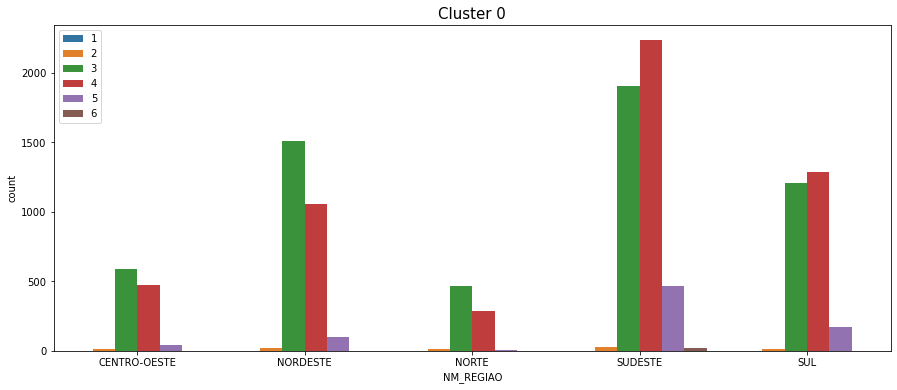

In [16]:
plt.figure(figsize=(15,6))
sns.countplot(x='NM_REGIAO',data=df0,hue='CD_CONCEITO_PROGRAMA',order=regiao)
plt.title('Cluster 0',size=15)
plt.legend(loc='upper left')

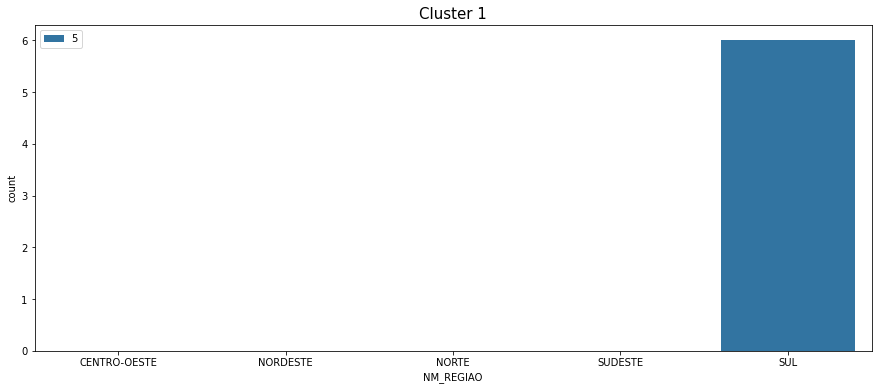

In [17]:
plt.figure(figsize=(15,6))
sns.countplot(x='NM_REGIAO',data=df1,hue='CD_CONCEITO_PROGRAMA',order=regiao)
plt.title('Cluster 1',size=15)
plt.legend(loc='upper left')

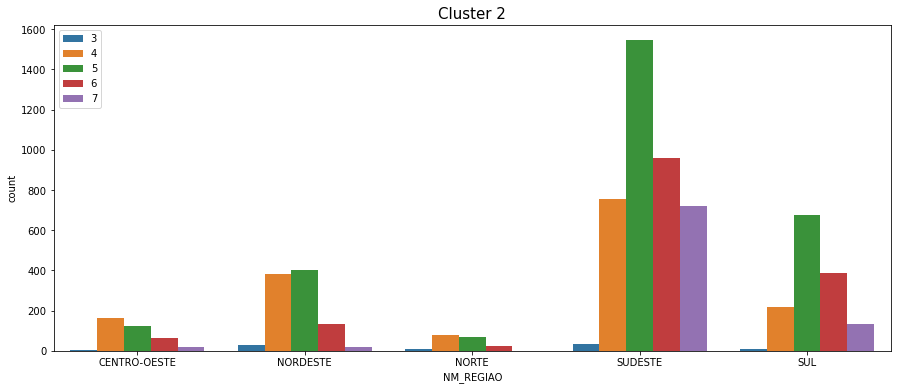

In [18]:
plt.figure(figsize=(15,6))
sns.countplot(x='NM_REGIAO',data=df2,hue='CD_CONCEITO_PROGRAMA',order=regiao)
plt.title('Cluster 2',size=15)
plt.legend(loc='upper left')

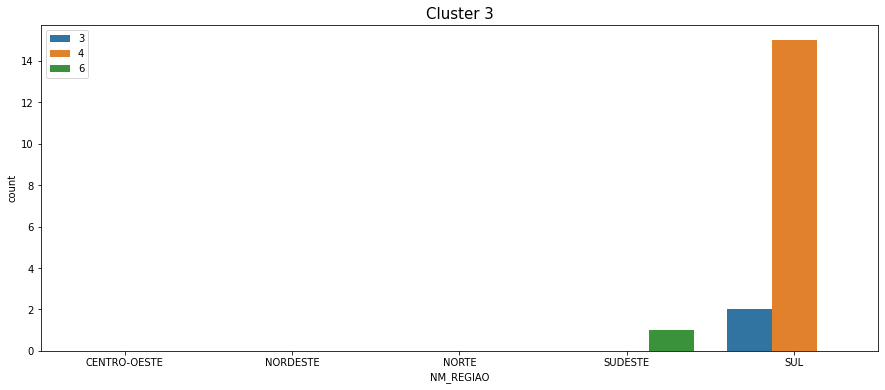

In [19]:
plt.figure(figsize=(15,6))
sns.countplot(x='NM_REGIAO',data=df3,hue='CD_CONCEITO_PROGRAMA',order=regiao)
plt.title('Cluster 3',size=15)
plt.legend(loc='upper left')

In [20]:
#tamanho de cada cluster
index=0
for i in [df0,df1,df2,df3]:
    print(index,"=",len(i))
    index+=1

0 = 11922
1 = 6
2 = 6956
3 = 18


In [ ]:
#número de docentes de cada cluster
index=0
for i in [df0,df1,df2,df3]:
    print(index,"=",df['IB_Total_docentes'])
    index+=1